<a href="https://colab.research.google.com/github/PosgradoMNA/ActividadesAprendizaje-A01794419-IgnacioQuintero/blob/main/Module3_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python
## Module 3 - Exploratory Data Analysis

* Alumno: Ignacio Antonio Quintero Chávez.
* Matrícula: A01794419.
* Materia: Ciencia y analítica de datos.
* Profesora: María de la Paz Rico Fernández.
* Fecha: 25 Octubre 2022.

**Exploratory Data Analysis (EDA)**

Preliminary step in data analysis to:
* Summarize main characteristics of the data.
* Gain better understanding of the data set.
* Uncover relationships between variables.
* Extract important variables.

### Import data

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
dataset = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [3]:
dataframe = pd.read_csv(dataset)
dataframe.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analyzing individual feature patterns using visualization

In [4]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
(%matplotlib inline

Understanding what types of variables we currently have.

In [5]:
# List the data types for each column
print(dataframe.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [6]:
dataframe["peak-rpm"].dtypes

dtype('float64')

Calculate the correlation between variables of type "int64" or "float64" using the method "corr".

In [7]:
dataframe.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [8]:
# Finding the correlation between: bore, stroke, compression-ratio, and horsepower.
dataframe[["bore", "stroke", "compression-ratio", "horsepower"]].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Continuous Numerical Variables

**Positive Linear Relationship**

(0.0, 53505.59216512466)

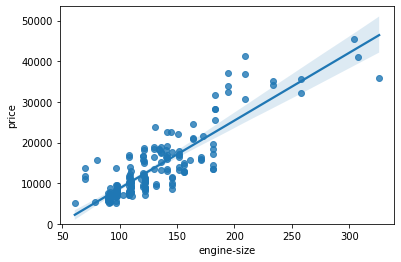

In [9]:
# Finding the scatterplot of "engine-size" and "price"
sns.regplot(x="engine-size", y="price", data=dataframe)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables.

In [10]:
# Examining the correlation between "engine-size" and "price"
dataframe[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


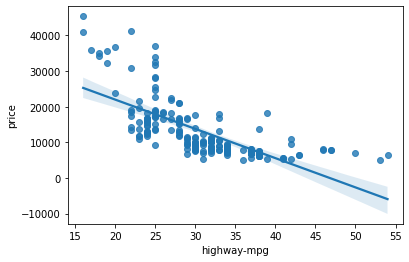

In [11]:
# Get the scatterplot of "highway-mpg" and "price"
sns.regplot(x="highway-mpg", y="price", data=dataframe)

As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables.

In [12]:
# Examining the correlation between these two variables
dataframe[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Categorical Variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

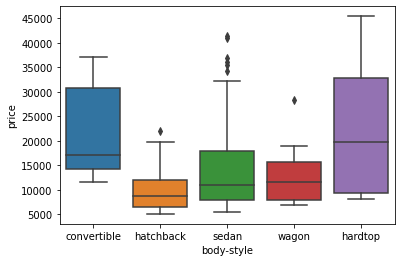

In [13]:
# Looking at the relationship between "body-style" and "price"
sns.boxplot(x="body-style", y="price", data=dataframe)

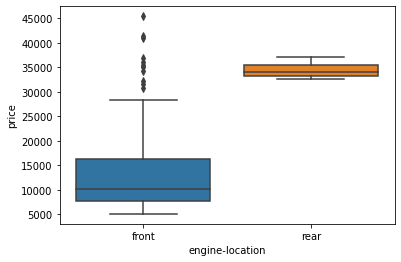

In [14]:
# Examining variables "engine-location" and "price"
sns.boxplot(x="engine-location", y="price", data=dataframe)

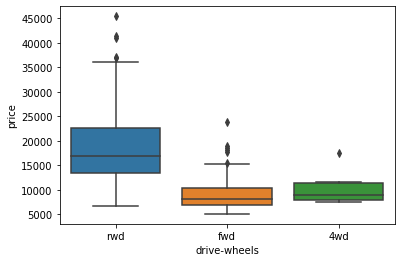

In [15]:
# Examining "drive-wheels" and "price"
sns.boxplot(x="drive-wheels", y="price", data=dataframe)

## Descriptive Statistical Analysis

The **describe** function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

In [16]:
dataframe.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


The default setting of 'describe' skips variables of type object. We can apply the method 'describe' on the variables of type 'object' as follows:

In [17]:
dataframe.describe(include=["object"])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Value Counts

Value counts is a good way of understanding how many units of each characteristic/variable we have.

In [19]:
# Checking the value counts for 'drive-wheels'
dataframe["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [20]:
# Converting the series to a dataframe
dataframe["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [23]:
drive_wheels_counts = dataframe["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={"drive-wheels": "value_counts"}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [24]:
# Renaming the index to 'drive-wheels'
drive_wheels_counts.index.name = "drive-wheels"
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [25]:
# Repeating the process for the variable 'engine-location'
engine_loc_counts = dataframe["engine-location"].value_counts().to_frame()
engine_loc_counts.rename(columns={"engine-location": "value_counts"}, inplace=True)
engine_loc_counts

,value_counts
front,198
rear,3


## Basics of Grouping

The 'groupby' method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

In [26]:
# Grouping the variable 'drive-wheels'
dataframe["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [28]:
# Creating the variable 'df_group_one'
df_group_one = dataframe[["drive-wheels", "body-style", "price"]]

In [29]:
# Calculate the average price for each of the different categories of data
df_group_one = df_group_one.groupby(["drive-wheels"], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [32]:
# Grouping by multiple variables
df_gptest = dataframe[["drive-wheels", "body-style", "price"]]
grouped_test_1 = df_gptest.groupby(["drive-wheels", "body-style"], as_index = False).mean()
grouped_test_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [33]:
# Converting the dataframe to a pivot table
grouped_pivot = grouped_test_1.pivot(index = "drive-wheels", columns="body-style")
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [34]:
# Filling missing values with 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<function matplotlib.pyplot.show(*args, **kw)>

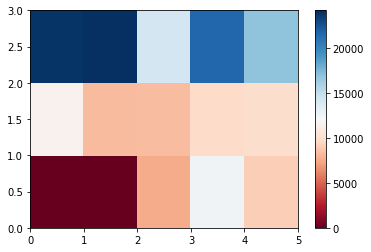

In [36]:
# Using a heatmap to visualize the relationship between Body Style vs Price
plt.pcolor(grouped_pivot, cmap="RdBu")
plt.colorbar()
plt.show

## Correlation and Causation

**Correlation**: It is a measure of the extent of interdependence between variables.

**Causation:** It if the relationship between cause and effect between two variables.

**Pearson correlation:** It measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

**1:** Perfect positive linear correlation

**0:** No linear correlation, the two variables most likely do not affect each other.

**-1:** Perfect negative linear correlation.

**P-value:** It is the probability value that the correlation between these two variables is statistically significant.

Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

**p-value is  < 0.001:** we say there is strong evidence that the correlation is significant.

**the p-value is  < 0.05:** there is moderate evidence that the correlation is significant.

**the p-value is < 0.1:** there is weak evidence that the correlation is significant.

**the p-value is > 0.1**: there is no evidence that the correlation is significant.

In [37]:
# Importing the library
from scipy import stats

In [38]:
# Calculating the Pearson correlation, coefficient, and P-value of 'wheel-base' and 'price'
pearson_coef, p_value = stats.pearsonr(dataframe["wheel-base"], dataframe["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508 with a P-value of P = 8.076488270733218e-20


In [39]:
# Calculating the Pearson correlation, coefficient, and P-value of 'horsepower' and 'price'
pearson_coef, p_value = stats.pearsonr(dataframe["horsepower"], dataframe["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P=", p_value)

The Pearson Correlation Coefficient is 0.8095745670036559 with a P-value of P= 6.369057428260101e-48


In [40]:
# Calculating the Pearson correlation, coefficient, and P-value of 'length' and 'price'
pearson_coef, p_value = stats.pearsonr(dataframe["horsepower"], dataframe["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P=", p_value)

The Pearson Correlation Coefficient is 0.8095745670036559 with a P-value of P= 6.369057428260101e-48


## ANOVA

**ANOVA: Analysis of Variance**

It is a statistical method used to test whether there are significant differences between the means of two or more groups.

It returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-score.

**P-value:** It tells how statistically significant our calculated score value is.

In [41]:
# Grouping the data
grouped_test_2 = df_gptest[["drive-wheels", "price"]].groupby(["drive-wheels"])
grouped_test_2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [42]:
# Obtain the values of the method group using the method "get_group"
grouped_test_2.get_group("4wd")["price"]

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [43]:
# Using the function 'f_oneway' to obtain the F-test score and P-value
f_val, p_val = stats.f_oneway(grouped_test_2.get_group("fwd")["price"], grouped_test_2.get_group("rwd")["price"], grouped_test_2.get_group("4wd")["price"])
print("ANOVA results: F=", f_val, ", P=", p_val)

ANOVA results: F= 67.95406500780399 , P= 3.3945443577151245e-23


In [44]:
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test_2.get_group('fwd')['price'], grouped_test_2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [45]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test_2.get_group('4wd')['price'], grouped_test_2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


**Important variables**

Continuous numerical variables:

* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore

Categorical variables:

* Drive-wheels

### Course progress

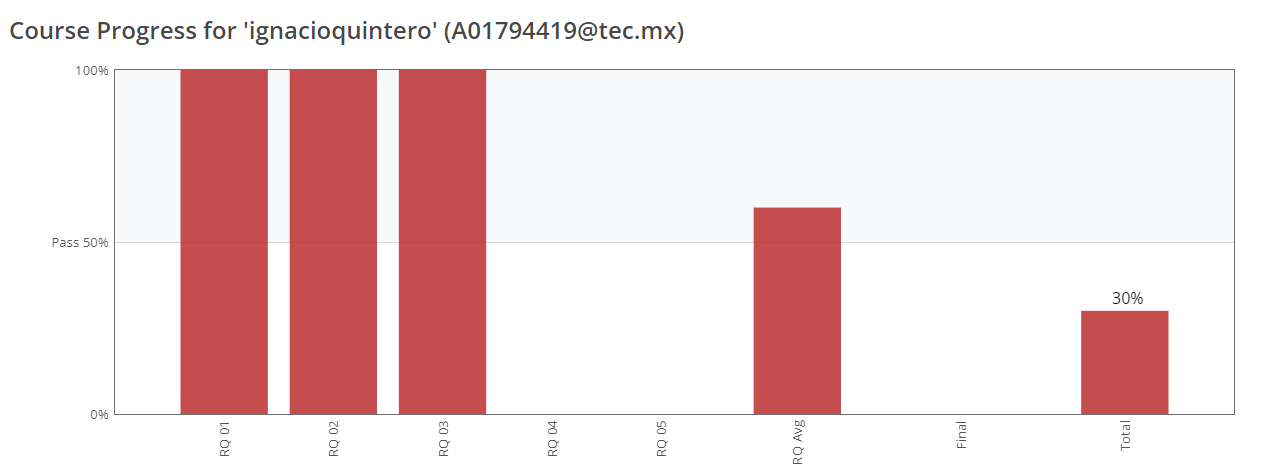